In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [2]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [3]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [4]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616759 entries, 0 to 1616758
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1616759 non-null  int64  
 1   kWh       1616759 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 24.7 MB


In [5]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1616754    0.19
1616755    0.19
1616756    0.19
1616757    0.19
1616758    0.19
Name: kWh, Length: 1616759, dtype: float64

In [6]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1616754    0.19
1616755    0.19
1616756    0.19
1616757    0.19
1616758    0.19
Name: kWh, Length: 1616759, dtype: float64

In [7]:
l=len(conso_data)-1
l

1616758

In [8]:
conso_data['sec']=conso_data['Interval']/1000


In [9]:
conso_data['Wh']=3600000/conso_data['Interval']


In [10]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [11]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616759 entries, 0 to 1616758
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1616759 non-null  int64  
 1   kWh        1616759 non-null  float64
 2   sec        1616759 non-null  float64
 3   Wh         1616759 non-null  float64
 4   cumul(ms)  1616759 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 61.7 MB


In [12]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1616754,18681,0.19,18.681,192.709170,39977250576
1616755,18431,0.19,18.431,195.323097,39977269007
1616756,18603,0.19,18.603,193.517175,39977287610
1616757,18893,0.19,18.893,190.546763,39977306503
1616758,18480,0.19,18.480,194.805195,39977324983


In [13]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

39977324983000

In [14]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 9, 56, 960363)

In [15]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [16]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [17]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [18]:
conso_data['dates']

0         2023-08-21 19:10:18.894363
1         2023-08-21 19:10:40.752363
2         2023-08-21 19:11:02.753363
3         2023-08-21 19:11:24.681363
4         2023-08-21 19:11:46.572363
                     ...            
1616754   2024-11-26 11:57:27.536363
1616755   2024-11-26 11:57:45.967363
1616756   2024-11-26 11:58:04.570363
1616757   2024-11-26 11:58:23.463363
1616758   2024-11-26 11:58:41.943363
Name: dates, Length: 1616759, dtype: datetime64[ns]

## créer les dates

In [19]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:10:18.894363,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:10:40.752363,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:11:02.753363,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:11:24.681363,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:11:46.572363,21/08/23
...,...,...,...,...,...,...,...
1616754,18681,0.19,18.681,192.709170,39977250576,2024-11-26 11:57:27.536363,26/11/24
1616755,18431,0.19,18.431,195.323097,39977269007,2024-11-26 11:57:45.967363,26/11/24
1616756,18603,0.19,18.603,193.517175,39977287610,2024-11-26 11:58:04.570363,26/11/24
1616757,18893,0.19,18.893,190.546763,39977306503,2024-11-26 11:58:23.463363,26/11/24


### save conso_data with dates

In [20]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [21]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('26/11/24', 26, 11, 2024)

In [22]:
here = now.strftime('%H:%M:%S')
here

'11:59:17'

In [23]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [24]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1498 entries, 1615261 to 1616758
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1498 non-null   int64         
 1   kWh        1498 non-null   float64       
 2   sec        1498 non-null   float64       
 3   Wh         1498 non-null   float64       
 4   cumul(ms)  1498 non-null   int64         
 5   dates      1498 non-null   datetime64[ns]
 6   days       1498 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 93.6+ KB


In [25]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [26]:
data = list(df_grp['kWh'])
print(data)

[0.826, 3.7, 4.232, 3.676, 4.189, 4.606, 3.527, 3.412, 3.513, 3.692, 3.762, 3.803, 4.252, 3.801, 3.473, 3.64, 3.32, 3.378, 4.282, 4.009, 4.044, 3.928, 3.445, 4.449, 3.75, 3.76, 4.351, 4.691, 3.811, 3.223, 3.179, 3.995, 3.677, 3.16, 3.801, 4.138, 3.759, 3.576, 4.776, 4.191, 4.544, 3.772, 3.41, 4.301, 3.88, 3.861, 3.438, 4.081, 3.655, 3.399, 4.133, 3.386, 3.886, 3.833, 3.642, 3.756, 4.244, 3.301, 3.872, 2.983, 2.055, 2.042, 2.451, 4.089, 3.721, 4.331, 3.613, 3.923, 3.743, 3.911, 3.997, 4.106, 3.652, 3.157, 3.804, 3.511, 3.624, 3.709, 3.684, 3.241, 3.904, 3.212, 3.792, 3.61, 4.08, 3.564, 3.389, 3.815, 4.065, 4.33, 4.134, 3.998, 4.232, 3.745, 3.927, 3.862, 3.915, 3.74, 4.046, 4.346, 3.884, 3.507, 3.682, 3.67, 3.349, 3.846, 3.995, 4.102, 3.475, 4.176, 3.605, 4.071, 4.537, 3.682, 3.431, 3.58, 4.16, 3.699, 4.084, 3.98, 3.746, 3.591, 5.127, 3.7, 3.766, 4.29, 4.104, 4.708, 4.404, 3.987, 3.774, 4.361, 4.683, 4.196, 4.791, 4.317, 3.725, 4.177, 3.704, 3.642, 3.531, 3.942, 3.676, 3.786, 3.578, 3.49

In [27]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [28]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [29]:
df = conso_data
len(df)

1616759

In [30]:
period(p=2)

2023-08-22 01:16:32.697363	2023-08-22 08:20:48.317363	7h 4m 15s 	2000


In [31]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.292888
dtype: float64

In [32]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.484394
dtype: float64

In [33]:
last=df_grp.iloc[-1]['kWh']
last

1.498

In [34]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1498 entries, 1615261 to 1616758
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1498 non-null   int64         
 1   kWh        1498 non-null   float64       
 2   sec        1498 non-null   float64       
 3   Wh         1498 non-null   float64       
 4   cumul(ms)  1498 non-null   int64         
 5   dates      1498 non-null   datetime64[ns]
 6   days       1498 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 93.6+ KB


In [35]:
# select day
day = today
#day = '16/08/24'


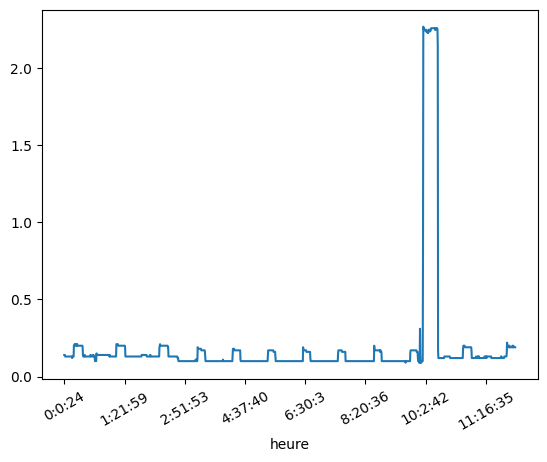

In [36]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [37]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:10:18.894363,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:10:40.752363,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:11:02.753363,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:11:24.681363,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:11:46.572363,21/08/23
...,...,...,...,...,...,...,...
1616754,18681,0.19,18.681,192.709170,39977250576,2024-11-26 11:57:27.536363,26/11/24
1616755,18431,0.19,18.431,195.323097,39977269007,2024-11-26 11:57:45.967363,26/11/24
1616756,18603,0.19,18.603,193.517175,39977287610,2024-11-26 11:58:04.570363,26/11/24
1616757,18893,0.19,18.893,190.546763,39977306503,2024-11-26 11:58:23.463363,26/11/24


In [38]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:24,26019,0.14,26.019,138.360429,39934227455,2024-11-26 00:00:24.415363,26/11/24
0:0:50,26038,0.14,26.038,138.259467,39934253493,2024-11-26 00:00:50.453363,26/11/24
0:1:17,26556,0.14,26.556,135.562585,39934280049,2024-11-26 00:01:17.009363,26/11/24
0:1:44,27441,0.13,27.441,131.190554,39934307490,2024-11-26 00:01:44.450363,26/11/24
0:2:11,27410,0.13,27.410,131.338927,39934334900,2024-11-26 00:02:11.860363,26/11/24
...,...,...,...,...,...,...,...
11:57:27,18681,0.19,18.681,192.709170,39977250576,2024-11-26 11:57:27.536363,26/11/24
11:57:45,18431,0.19,18.431,195.323097,39977269007,2024-11-26 11:57:45.967363,26/11/24
11:58:4,18603,0.19,18.603,193.517175,39977287610,2024-11-26 11:58:04.570363,26/11/24


In [39]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 19/11/24 4.569
Min : 18/11/24 3.154


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1615261,26019,0.14,26.019,138.360429,39934227455,2024-11-26 00:00:24.415363,26/11/24,0:0:24
1615262,26038,0.14,26.038,138.259467,39934253493,2024-11-26 00:00:50.453363,26/11/24,0:0:50
1615263,26556,0.14,26.556,135.562585,39934280049,2024-11-26 00:01:17.009363,26/11/24,0:1:17
1615264,27441,0.13,27.441,131.190554,39934307490,2024-11-26 00:01:44.450363,26/11/24,0:1:44
1615265,27410,0.13,27.410,131.338927,39934334900,2024-11-26 00:02:11.860363,26/11/24,0:2:11
...,...,...,...,...,...,...,...,...
1616754,18681,0.19,18.681,192.709170,39977250576,2024-11-26 11:57:27.536363,26/11/24,11:57:27
1616755,18431,0.19,18.431,195.323097,39977269007,2024-11-26 11:57:45.967363,26/11/24,11:57:45
1616756,18603,0.19,18.603,193.517175,39977287610,2024-11-26 11:58:04.570363,26/11/24,11:58:4
1616757,18893,0.19,18.893,190.546763,39977306503,2024-11-26 11:58:23.463363,26/11/24,11:58:23


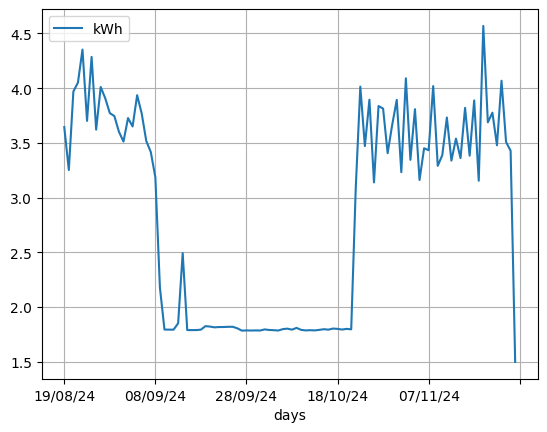

In [40]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-11-26 00:00:24.415363	2024-11-26 08:20:01.543363	8h 19m 37s 	1000
2024-11-26 08:20:01.543363	2024-11-26 11:58:41.943363	3h 38m 40s 	498
<class 'pandas.core.frame.DataFrame'>
Index: 1498 entries, 1615261 to 1616758
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1498 non-null   int64         
 1   kWh        1498 non-null   float64       
 2   sec        1498 non-null   float64       
 3   Wh         1498 non-null   float64       
 4   cumul(ms)  1498 non-null   int64         
 5   dates      1498 non-null   datetime64[ns]
 6   days       1498 non-null   object        
 7   heure      1498 non-null   object        
 8   hours      1498 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 117.0+ KB


('26/11/24', <Axes: xlabel='hours'>)

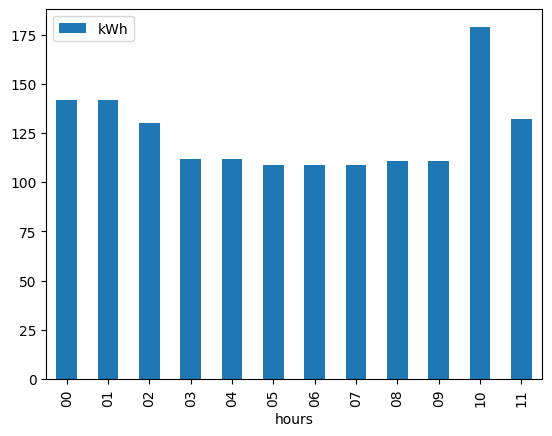

In [41]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [42]:
df_grp

,kWh
days,
21/08/23,0.826
22/08/23,3.700
23/08/23,4.232
24/08/23,3.676
25/08/23,4.189
...,...
22/11/24,3.478
23/11/24,4.068
24/11/24,3.508


In [43]:
# select number of days to display
span = 30
#df_grp.tail(span)


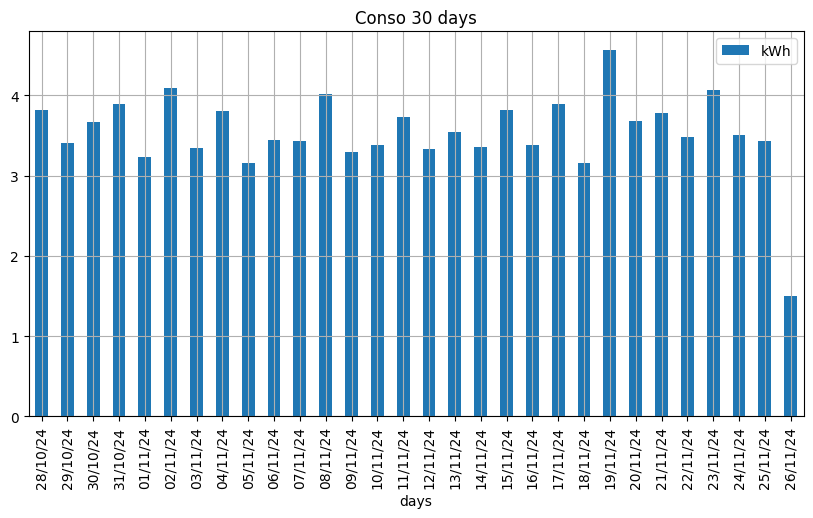

In [44]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


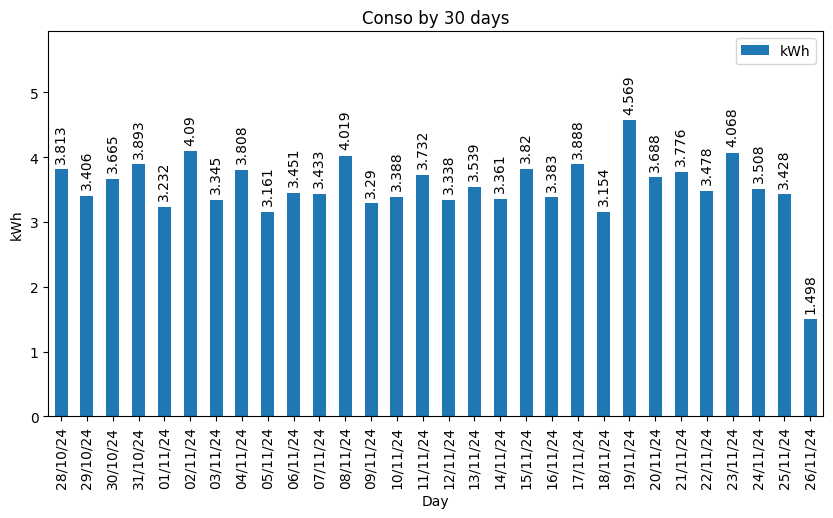

In [45]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [46]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
28/10/24    3.813
29/10/24    3.406
30/10/24    3.665
31/10/24    3.893
01/11/24    3.232
02/11/24    4.090
03/11/24    3.345
04/11/24    3.808
05/11/24    3.161
06/11/24    3.451
07/11/24    3.433
08/11/24    4.019
09/11/24    3.290
10/11/24    3.388
11/11/24    3.732
12/11/24    3.338
13/11/24    3.539
14/11/24    3.361
15/11/24    3.820
16/11/24    3.383
17/11/24    3.888
18/11/24    3.154
19/11/24    4.569
20/11/24    3.688
21/11/24    3.776
22/11/24    3.478
23/11/24    4.068
24/11/24    3.508
25/11/24    3.428
26/11/24    1.498
Name: kWh, dtype: float64

In [47]:
x_labels=df_grp.tail(span).index
x_labels

Index(['28/10/24', '29/10/24', '30/10/24', '31/10/24', '01/11/24', '02/11/24',
       '03/11/24', '04/11/24', '05/11/24', '06/11/24', '07/11/24', '08/11/24',
       '09/11/24', '10/11/24', '11/11/24', '12/11/24', '13/11/24', '14/11/24',
       '15/11/24', '16/11/24', '17/11/24', '18/11/24', '19/11/24', '20/11/24',
       '21/11/24', '22/11/24', '23/11/24', '24/11/24', '25/11/24', '26/11/24'],
      dtype='object', name='days')

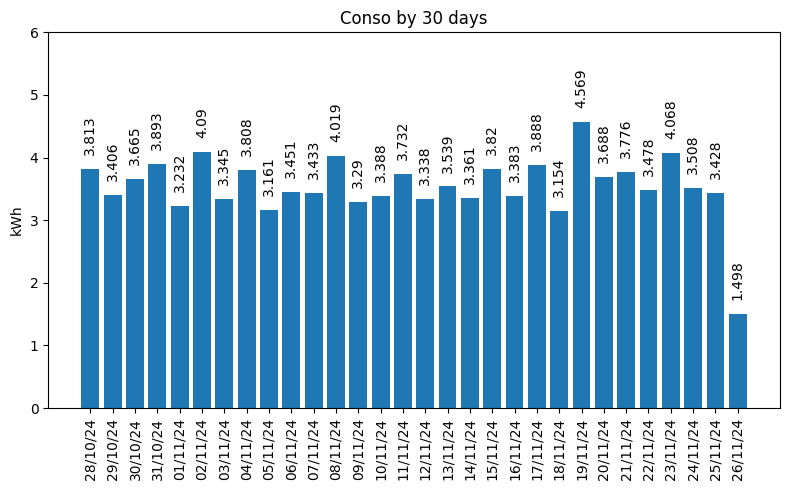

In [48]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [49]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

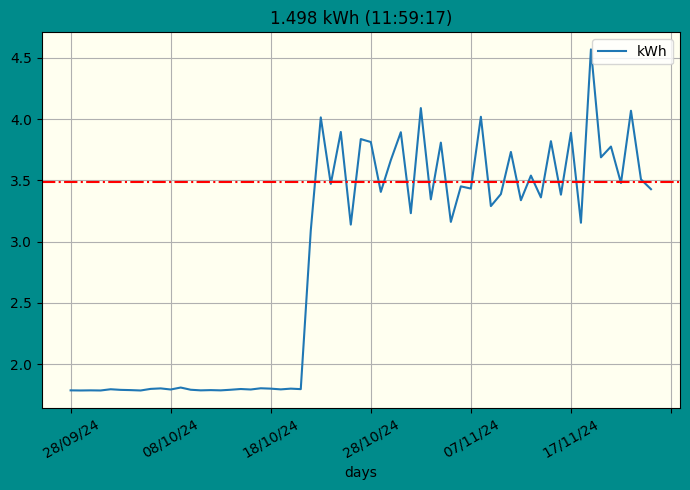

In [50]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

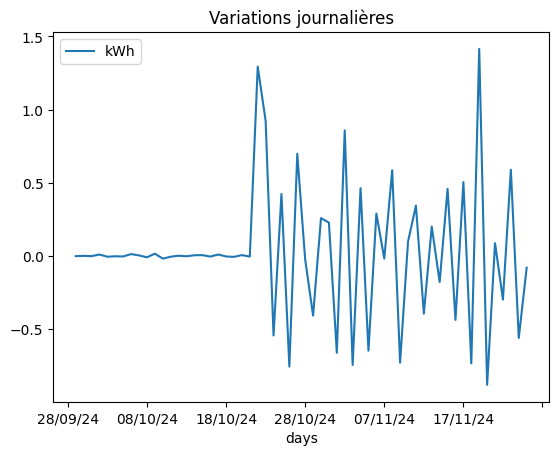

In [51]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [52]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:10:18.894363,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:10:40.752363,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:11:02.753363,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:11:24.681363,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:11:46.572363,21/08/23,19
...,...,...,...,...,...,...,...,...
1616754,18681,0.19,18.681,192.709170,39977250576,2024-11-26 11:57:27.536363,26/11/24,11
1616755,18431,0.19,18.431,195.323097,39977269007,2024-11-26 11:57:45.967363,26/11/24,11
1616756,18603,0.19,18.603,193.517175,39977287610,2024-11-26 11:58:04.570363,26/11/24,11
1616757,18893,0.19,18.893,190.546763,39977306503,2024-11-26 11:58:23.463363,26/11/24,11


In [53]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [54]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [55]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [56]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,826
22/08/23,3700
23/08/23,4232
24/08/23,3676
25/08/23,4189
...,...
22/11/24,3478
23/11/24,4068
24/11/24,3508


In [58]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:10:18.894363,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:10:40.752363,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:11:02.753363,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:11:24.681363,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:11:46.572363,21/08/23,19
...,...,...,...,...,...,...,...,...
1616754,18681,0.19,18.681,192.709170,39977250576,2024-11-26 11:57:27.536363,26/11/24,11
1616755,18431,0.19,18.431,195.323097,39977269007,2024-11-26 11:57:45.967363,26/11/24,11
1616756,18603,0.19,18.603,193.517175,39977287610,2024-11-26 11:58:04.570363,26/11/24,11
1616757,18893,0.19,18.893,190.546763,39977306503,2024-11-26 11:58:23.463363,26/11/24,11


In [59]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 19    0        21/08/23    19  0.16
               1        21/08/23    19  0.16
               2        21/08/23    19  0.16
               3        21/08/23    19  0.16
               4        21/08/23    19  0.16
...                          ...   ...   ...
26/11/24 11    1616754  26/11/24    11  0.19
               1616755  26/11/24    11  0.19
               1616756  26/11/24    11  0.19
               1616757  26/11/24    11  0.19
               1616758  26/11/24    11  0.19

[1616759 rows x 3 columns]

In [60]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [61]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/2

In [62]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,826,826
22/08/23,3700,3700
23/08/23,4232,4232
24/08/23,3676,3676
25/08/23,4189,4189
...,...,...
22/11/24,3478,3478
23/11/24,4068,4068
24/11/24,3508,3508


In [63]:
grp_by_day['kWh'].cumsum()

days
21/08/23        826
22/08/23       4526
23/08/23       8758
24/08/23      12434
25/08/23      16623
             ...   
22/11/24    1604257
23/11/24    1608325
24/11/24    1611833
25/11/24    1615261
26/11/24    1616759
Name: kWh, Length: 464, dtype: int64

In [64]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 19     150
         20     286
         21     130
         22     129
         23     131
...             ...
26/11/24 07     109
         08     111
         09     111
         10     179
         11     132

[11105 rows x 1 columns]

In [65]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  19           150
          20           436
          21           566
          22           695
          23           826
                    ...   
26/11/24  07       1616226
          08       1616337
          09       1616448
          10       1616627
          11       1616759
Name: kWh, Length: 11105, dtype: int64

In [66]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 19     150     150    NaN
         20     286     436  136.0
         21     130     566 -156.0
         22     129     695   -1.0
         23     131     826    2.0
...             ...     ...    ...
26/11/24 07     109     965    0.0
         08     111    1076    2.0
         09     111    1187    0.0
         10     179    1366   68.0
         11     132    1498  -47.0

[11105 rows x 3 columns]

In [67]:
today, grp_by_dayhours.loc[today]

('26/11/24',
        kWh  cumsum  diff
 hours                   
 00     142     142   NaN
 01     142     284   0.0
 02     130     414 -12.0
 03     112     526 -18.0
 04     112     638   0.0
 05     109     747  -3.0
 06     109     856   0.0
 07     109     965   0.0
 08     111    1076   2.0
 09     111    1187   0.0
 10     179    1366  68.0
 11     132    1498 -47.0)

Text(0.5, 1.0, 'Cumul journalier')

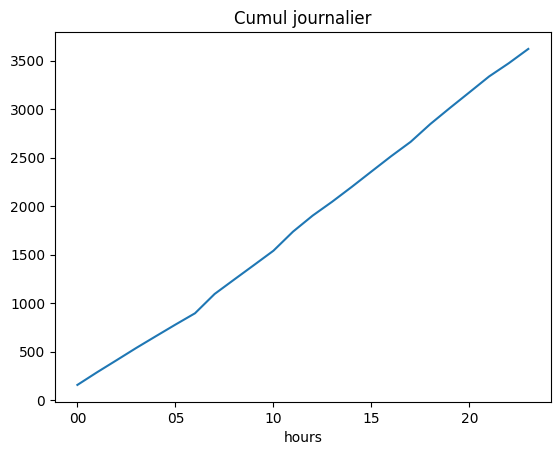

In [68]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

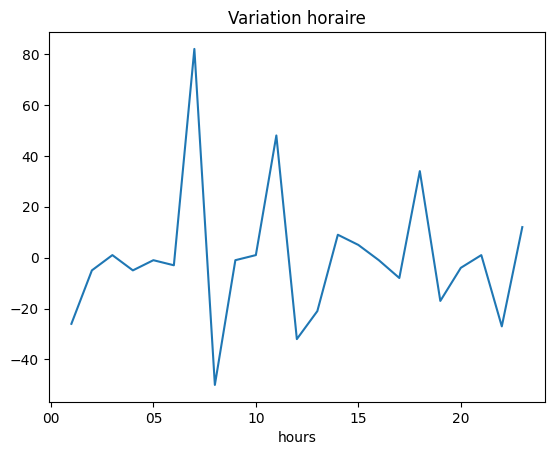

In [69]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [70]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

464

In [71]:
df_grp.tail(n)['kWh'].describe()


count    464.000000
mean       3.484394
std        0.707034
min        0.826000
25%        3.347250
50%        3.618500
75%        3.876000
max        5.127000
Name: kWh, dtype: float64

In [72]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '464 days')

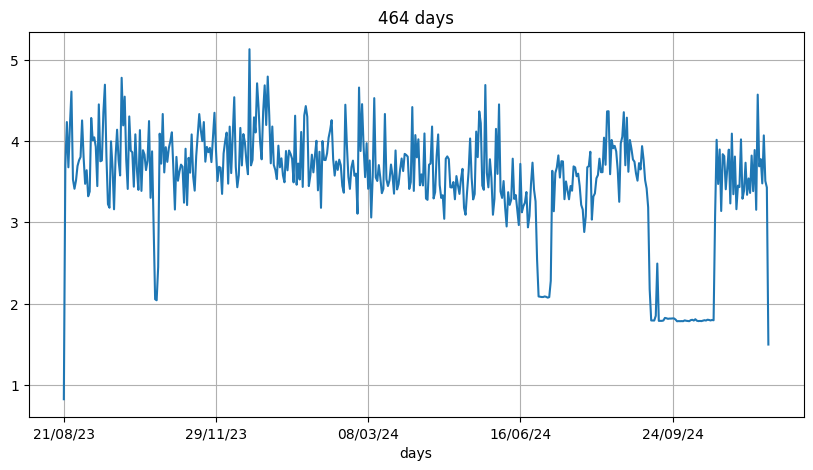

In [73]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

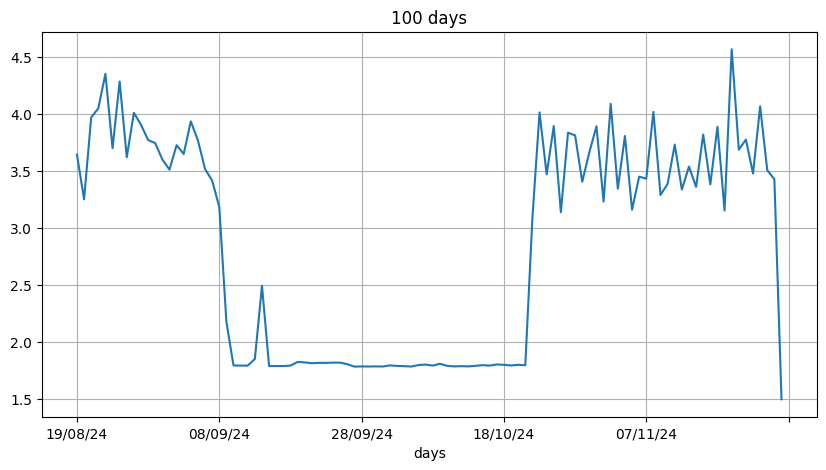

In [74]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [75]:
df_grp['kWh']

days
21/08/23    0.826
22/08/23    3.700
23/08/23    4.232
24/08/23    3.676
25/08/23    4.189
            ...  
22/11/24    3.478
23/11/24    4.068
24/11/24    3.508
25/11/24    3.428
26/11/24    1.498
Name: kWh, Length: 464, dtype: float64

In [76]:
df_grp.describe()

,kWh
count,464.000000
mean,3.484394
std,0.707034
min,0.826000
25%,3.347250
50%,3.618500
75%,3.876000
max,5.127000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

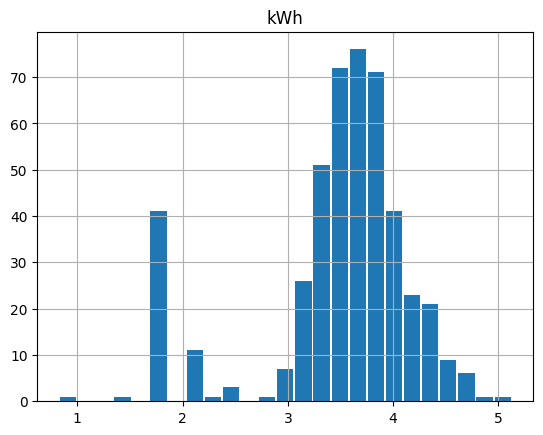

In [77]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [78]:
df_grp.tail(span)['kWh']

days
19/08/24    3.644
20/08/24    3.252
21/08/24    3.970
22/08/24    4.051
23/08/24    4.353
            ...  
22/11/24    3.478
23/11/24    4.068
24/11/24    3.508
25/11/24    3.428
26/11/24    1.498
Name: kWh, Length: 100, dtype: float64

# Conso par heure

In [79]:
day

'26/11/24'

In [80]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,142,142,NaN
01,142,284,0.0
02,130,414,-12.0
03,112,526,-18.0
04,112,638,0.0
05,109,747,-3.0
06,109,856,0.0
07,109,965,0.0
08,111,1076,2.0


In [81]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


12

In [82]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 13)

In [83]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [84]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [85]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
Name: days, dtype: float64

In [86]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [87]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 00 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     12 non-null     int64  
 1   cumsum  12 non-null     int64  
 2   diff    11 non-null     float64
 3   days    12 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 480.0+ bytes


In [88]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
Name: days, dtype: float64

In [89]:
day

'26/11/24'

In [90]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,142,142,NaN,1.0
01,142,284,0.0,2.0
02,130,414,-12.0,3.0
03,112,526,-18.0,4.0
04,112,638,0.0,5.0
05,109,747,-3.0,6.0
06,109,856,0.0,7.0
07,109,965,0.0,8.0
08,111,1076,2.0,9.0


Text(0.5, 1.0, '26/11/24')

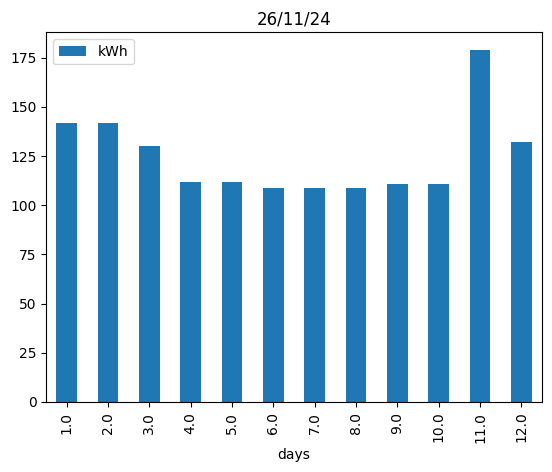

In [91]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [92]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11'], dtype='object', name='hours')

# Conso du jour


In [93]:
groupedbyhour.count()

,kWh
hours,
00,142
01,142
02,130
03,112
04,112
05,109
06,109
07,109
08,111


In [94]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    166
01    152
02    169
03    165
04    147
05    139
06    115
07    130
08    131
09    114
10    131
11    119
12    179
13    155
14    139
15    157
16    986
17    219
18    284
19    298
20    314
21    325
22    207
23    186
Name: kWh, dtype: int64

In [95]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

Text(0.5, 1.0, '100 days')

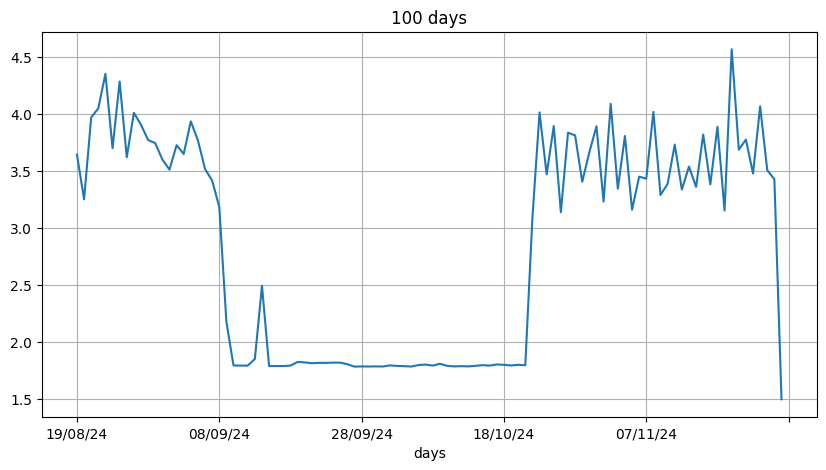

In [96]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [97]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

86.19753193855286


# Today

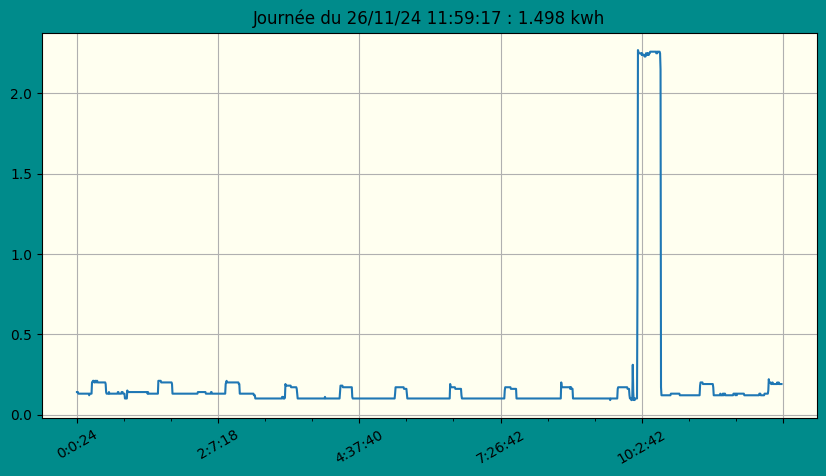

In [98]:
show(today,bgcolor='ivory')

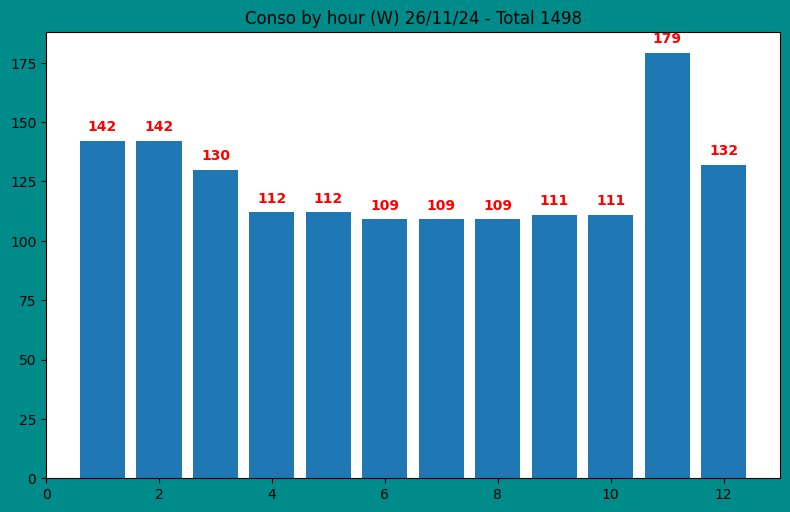

In [99]:
conso_by_hour(today)

In [100]:
day = '21/11/24'

('21/11/24', None)

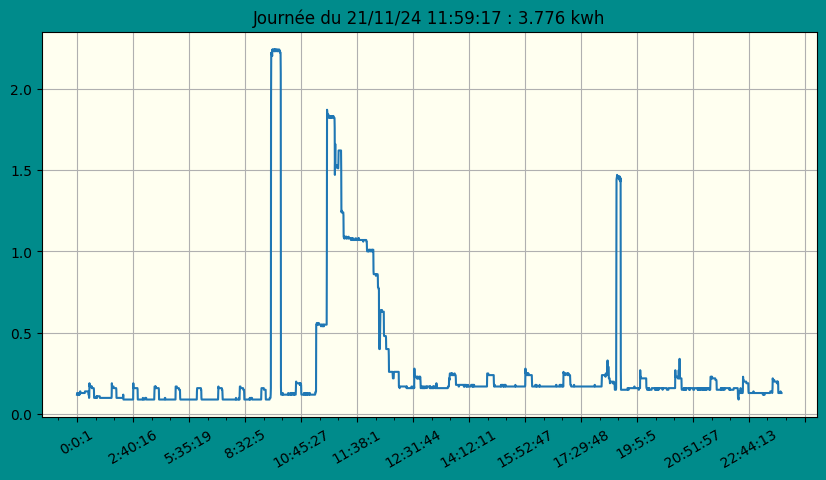

In [101]:
day, show(day,bgcolor='ivory')

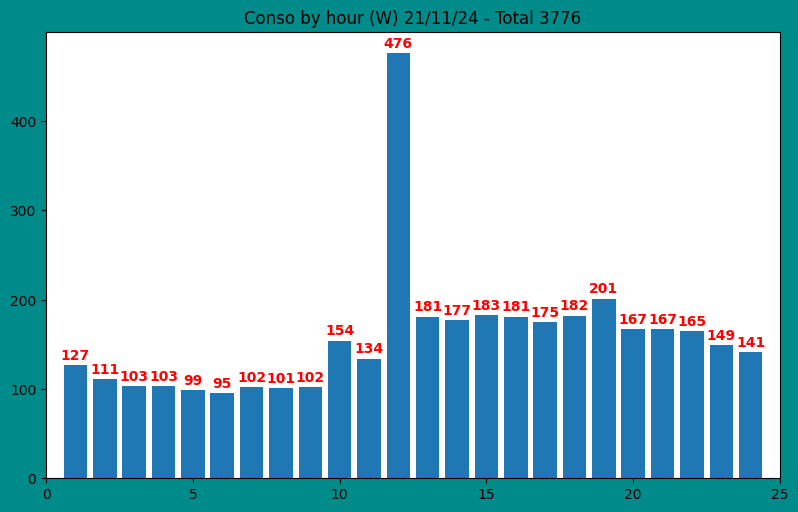

In [102]:
conso_by_hour(day)

('21/12/23', None)

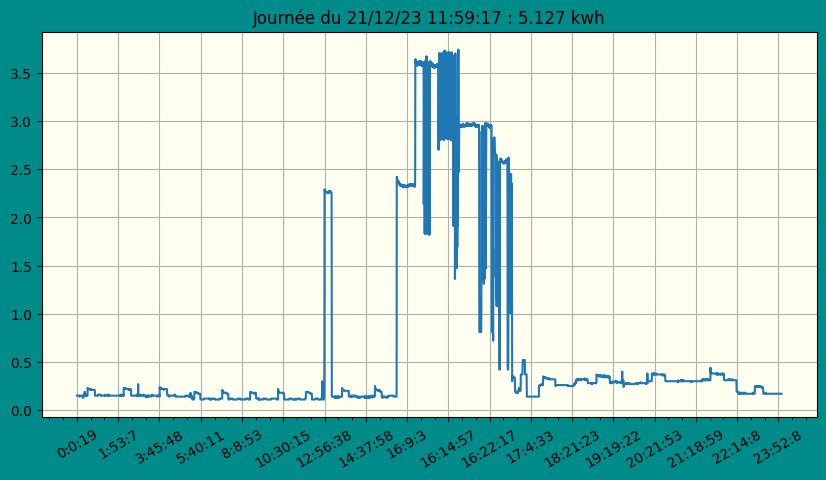

In [103]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

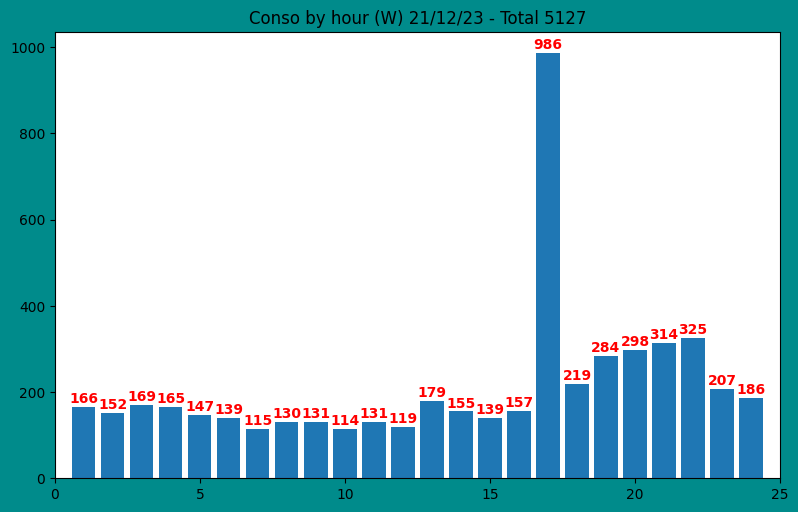

In [104]:
conso_by_hour(day)

In [105]:
sum(data)

5127

In [106]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,142,142,NaN,1.0
01,142,284,0.0,2.0
02,130,414,-12.0,3.0
03,112,526,-18.0,4.0
04,112,638,0.0,5.0
05,109,747,-3.0,6.0
06,109,856,0.0,7.0
07,109,965,0.0,8.0
08,111,1076,2.0,9.0


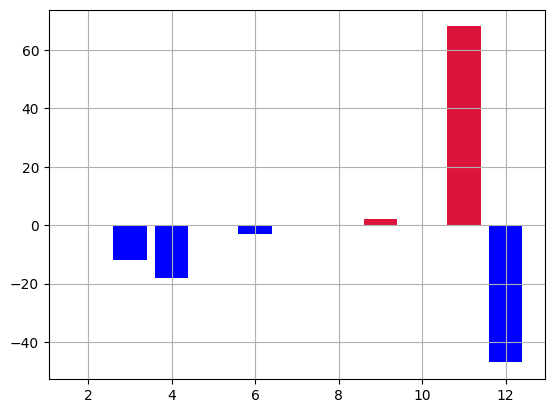

In [107]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [108]:
data

hours
00    166
01    152
02    169
03    165
04    147
05    139
06    115
07    130
08    131
09    114
10    131
11    119
12    179
13    155
14    139
15    157
16    986
17    219
18    284
19    298
20    314
21    325
22    207
23    186
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

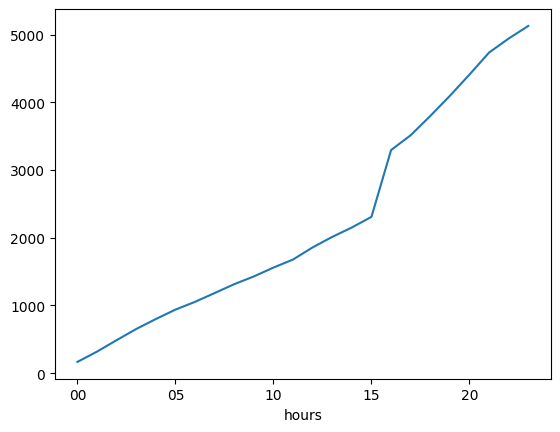

In [109]:
data.cumsum().plot()


<Axes: xlabel='hours'>

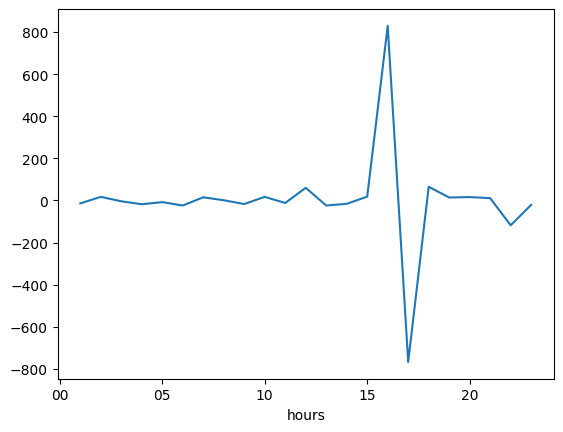

In [110]:
# evolution par heure
data.diff().plot()

In [111]:
data.diff().describe()

count     23.000000
mean       0.869565
std      243.258617
min     -767.000000
25%      -17.500000
50%       -4.000000
75%       16.500000
max      829.000000
Name: kWh, dtype: float64

<Axes: >

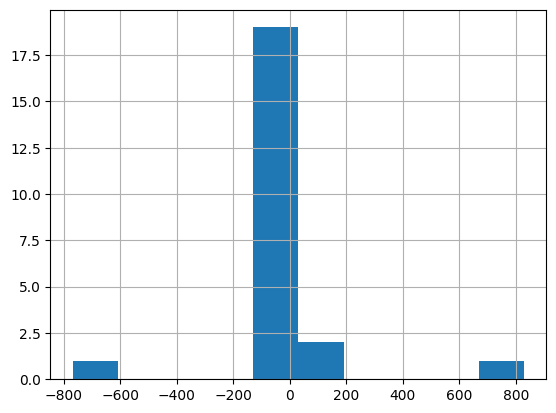

In [112]:
data.diff().hist()

# Test sauvegarde

In [113]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [114]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [115]:
#conso_byhour(day)

In [116]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


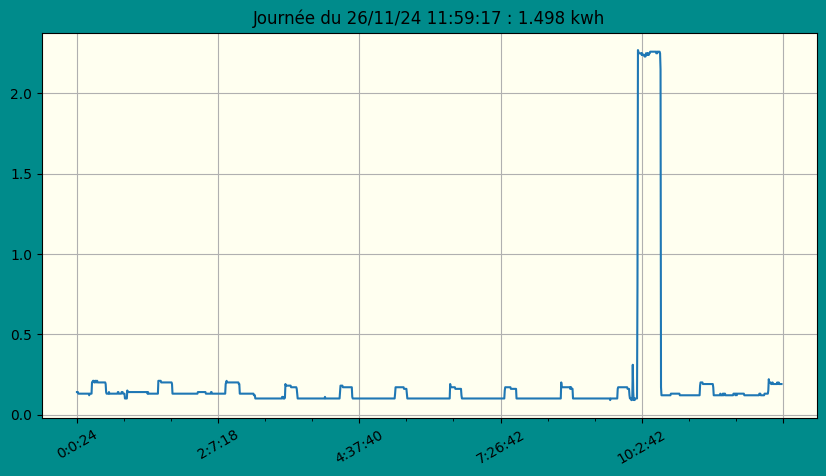

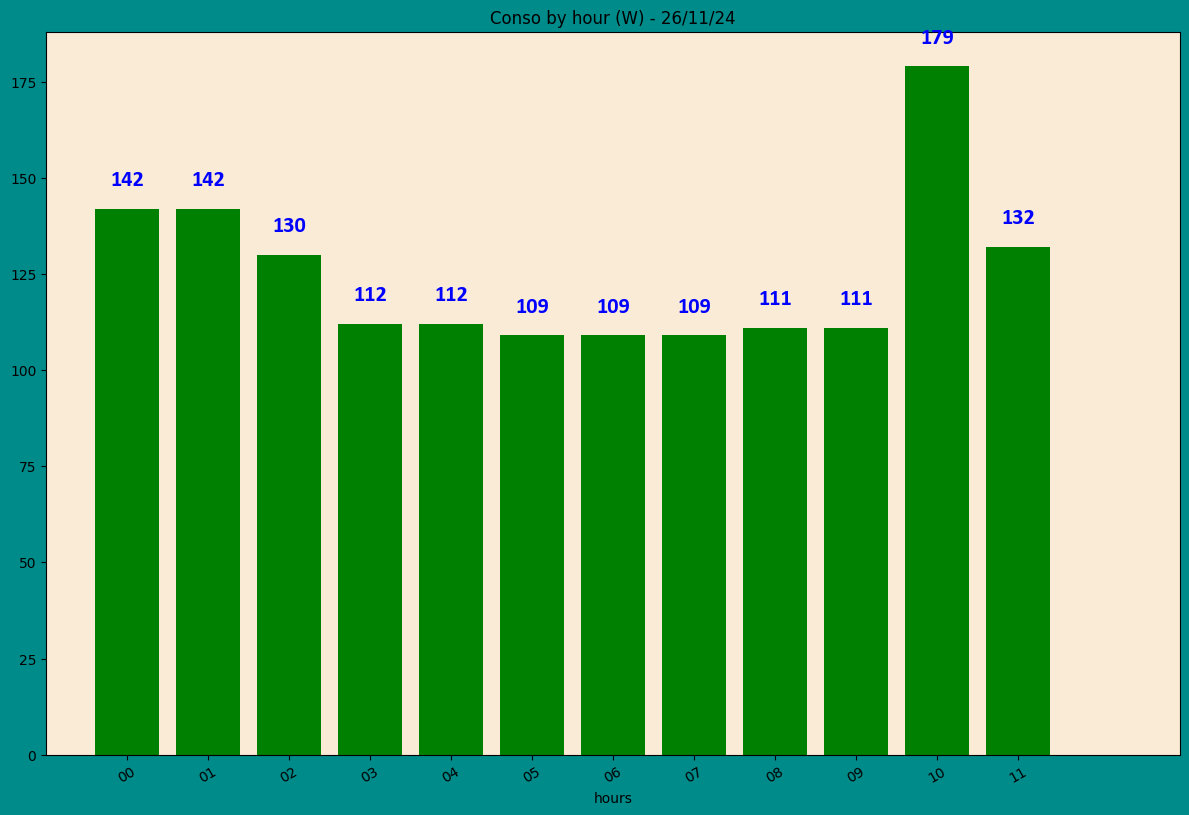

In [117]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [118]:
month.describe()


count    30.000000
mean      3.618700
std       0.323552
min       3.154000
25%       3.384250
50%       3.523500
75%       3.818250
max       4.569000
Name: kWh, dtype: float64

<Axes: >

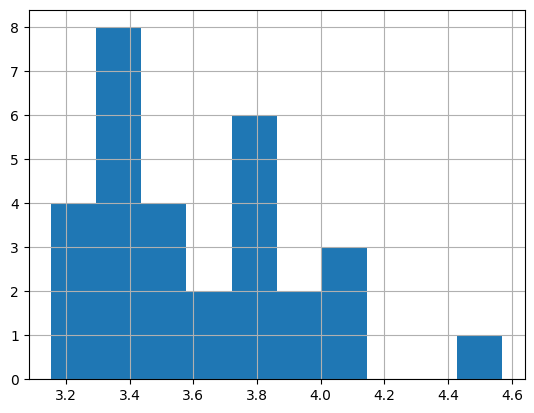

In [119]:
month.hist()

<Axes: xlabel='days'>

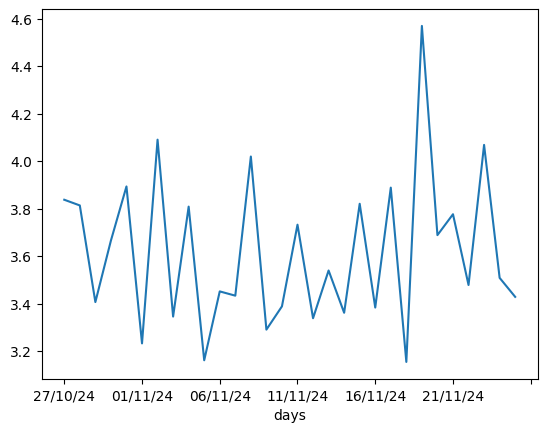

In [120]:
month.plot()

In [121]:
# date with max conso in 1 month
month.idxmax()

'19/11/24'

In [122]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'19/11/24'

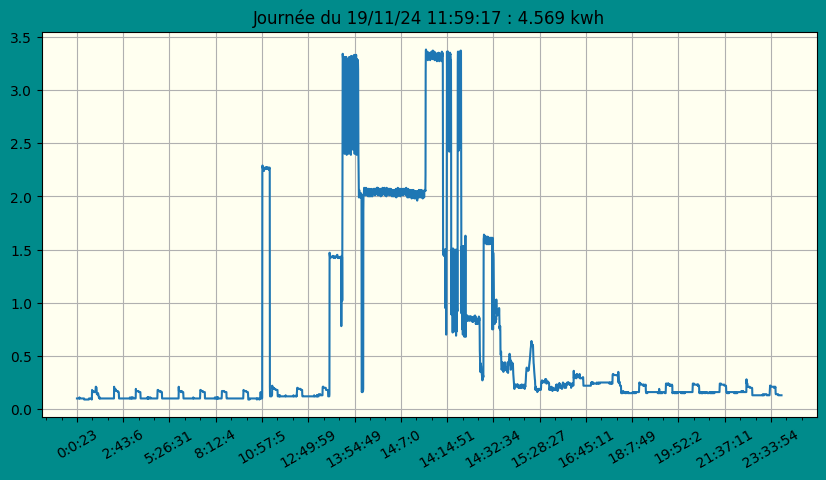

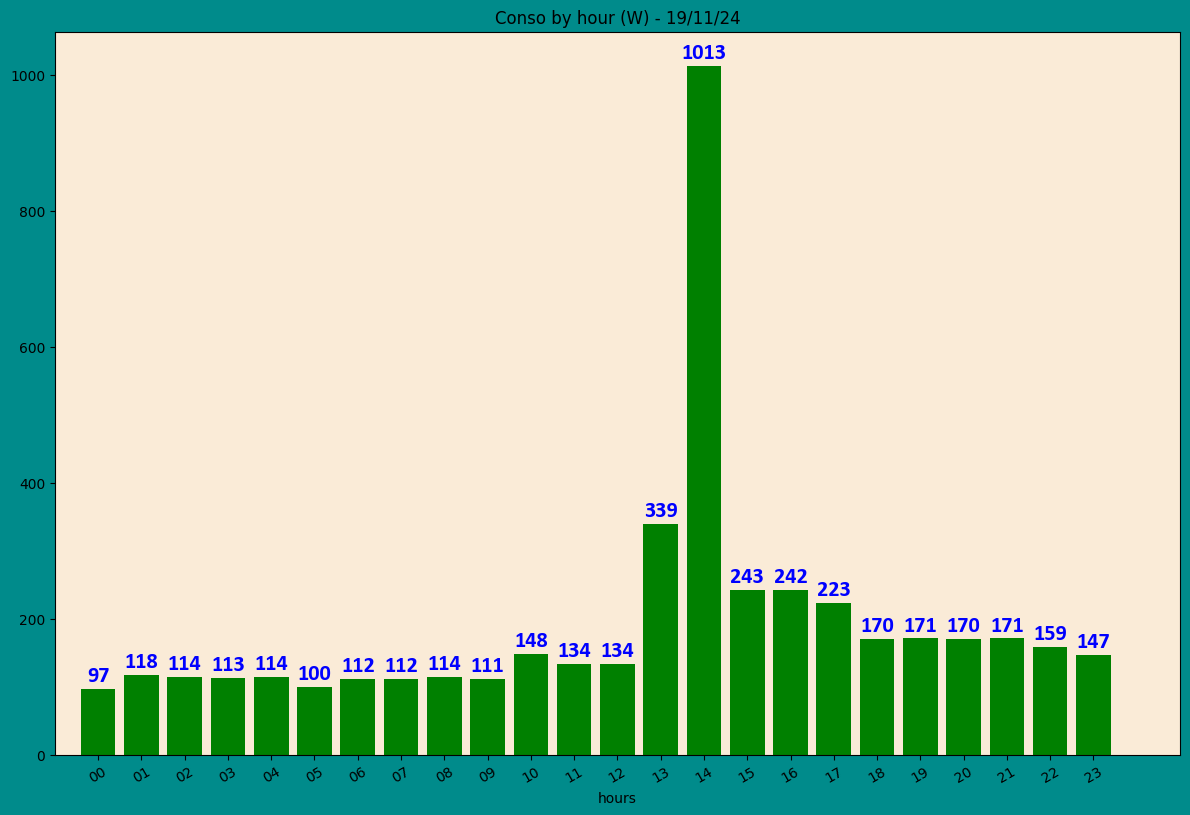

In [123]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [124]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 19     150     150    NaN   NaN
         20     286     436  136.0   NaN
         21     130     566 -156.0   NaN
         22     129     695   -1.0   NaN
         23     131     826    2.0   NaN
...             ...     ...    ...   ...
26/11/24 07     109     965    0.0   8.0
         08     111    1076    2.0   9.0
         09     111    1187    0.0  10.0
         10     179    1366   68.0  11.0
         11     132    1498  -47.0  12.0

[11105 rows x 4 columns]

In [125]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,97,97,NaN,NaN
01,118,215,21.0,NaN
02,114,329,-4.0,NaN
03,113,442,-1.0,NaN
04,114,556,1.0,NaN
05,100,656,-14.0,NaN
06,112,768,12.0,NaN
07,112,880,0.0,NaN
08,114,994,2.0,NaN


In [126]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

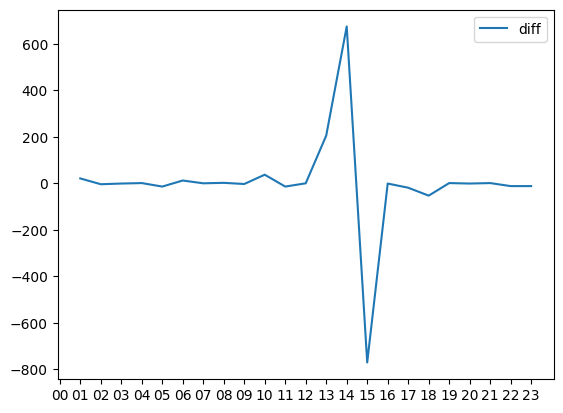

In [127]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

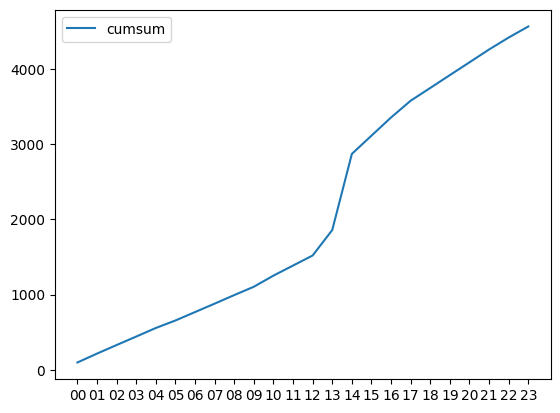

In [128]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [129]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB